In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
np.random.seed(12)

# Generate Data

In [3]:
rad = 10
thk = 5
sep = 5

N_class = 1000


def get_half(center_x=0, center_y=0, rad=10, thk=5):
    R_data = np.random.rand(N_class) * thk + rad
    Theta_data = np.random.rand(N_class) * np.pi

    X = center_x + R_data * np.cos(Theta_data)
    Y = center_y + R_data * np.sin(Theta_data)
    return X, Y

# top half
X_p, Y_p = get_half(0, 0)
Y_p = Y_p + sep / 2

# bottom half
X_n, Y_n = get_half(12.5, 0)
Y_n = -Y_n - sep / 2

XY_p = np.stack((X_p, Y_p), axis=1)
XY_n = np.stack((X_n, Y_n), axis=1)

X = np.concatenate((XY_p, XY_n), axis=0)

# augment with 1 in the beginning
Y = np.concatenate((np.ones(N_class), -np.ones(N_class)))


In [4]:
class KNNClassifier(object):
    def __init__(self, X, Y):
        self.X = X  # shape: (n, d)
        self.Y = Y  # shape: (n,)

    def predict(self, x, K=1):
        k, d = x.shape
        n, d = self.X.shape
        x = x.reshape(k, 1, d)
        Data = self.X.reshape(1, n, d)
        distance = self.distance(x, Data)  # shape: (k, n)
        # (k, 1, d) - (1, n, d) -> (k, n, d)-> (k, n)

        ind = np.argsort(distance, axis=-1)[:, :K]  # shape: (k, K)
        K_classes = self.Y[ind]
        # print(ind, k, distance.shape, ind.shape, K_classes)
        pred = []
        for i in range(k):
            mod = collections.Counter(K_classes[i]).most_common()[0][0]
            pred.append(mod)
        return np.asarray(pred)

    def distance(self, x, y, axis=-1):
        return np.linalg.norm(x - y, axis=-1)

In [5]:
knnClf = KNNClassifier(X, Y)

# (a) Show the decision regions for the 1-NN and 3-NN rules

## 1-NN

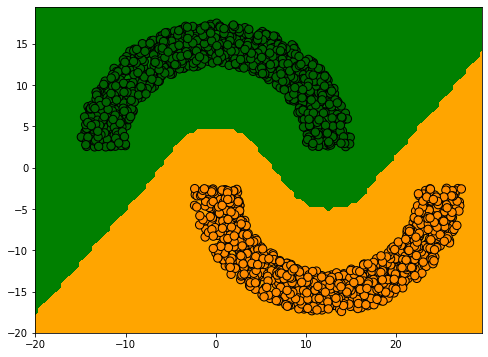

In [8]:
cmap_light = ListedColormap(["orange", "green"])
cmap_dark = ListedColormap(["darkorange", "darkgreen"])

xx, yy = np.meshgrid(np.arange(-20, 30, 0.5), np.arange(-20, 20, 0.5))
Z = knnClf.predict(np.c_[xx.ravel(), yy.ravel()], K=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=70, cmap=cmap_dark, edgecolors="black")

## 3-NN

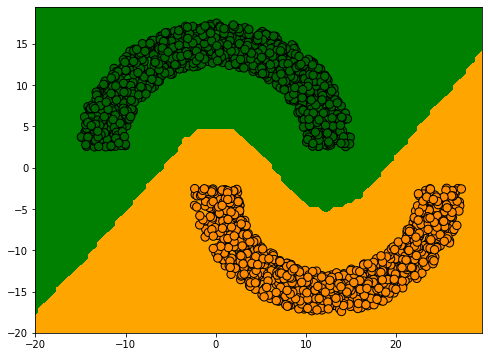

In [7]:
Z = knnClf.predict(np.c_[xx.ravel(), yy.ravel()], K=3).reshape(xx.shape)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=70, cmap=cmap_dark, edgecolors="black")